![visioncolab](https://drive.google.com/uc?export=view&id=10UMKqKSnU2grmitxYxvL7V6GVMu8RrpP)


`Google colab's for image processing, pattern recognition and computer vision`

[Domingo Mery](https://domingomery.ing.puc.cl/) - Department of Computer Science - Universidad Católica de Chile

# Image Processing with Geometric Transformation

# Libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image

In [3]:
!wget https://www.dropbox.com/s/xro9nm69qxt3pl9/louvre.png

--2024-08-29 20:53:26--  https://www.dropbox.com/s/xro9nm69qxt3pl9/louvre.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bi81xpu62dpeoog8pd1ef/louvre.png?rlkey=22w42w9zojyaxbnjt03a3n63z [following]
--2024-08-29 20:53:26--  https://www.dropbox.com/scl/fi/bi81xpu62dpeoog8pd1ef/louvre.png?rlkey=22w42w9zojyaxbnjt03a3n63z
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce923d882facf775f4707dd80e6.dl.dropboxusercontent.com/cd/0/inline/CZlXIrWC4yVYl-GsESt5WrqWP5pDdlMXUjVehwP1wC6szwDEvtieQk2hioCl5Ywk_adzdg_o1RCq8ZYJe1pWaL2mJLLMe9up_6Tw2BKwBQgp2J4YhAJIVjnODZ7o4JfD9Xw/file# [following]
--2024-08-29 20:53:27--  https://uce923d882facf775f4707dd80e6.dl.dropboxusercontent.com/cd/0/inline/CZlXIrWC4yVYl-GsESt5WrqWP5pD

size =  (1024, 1024)


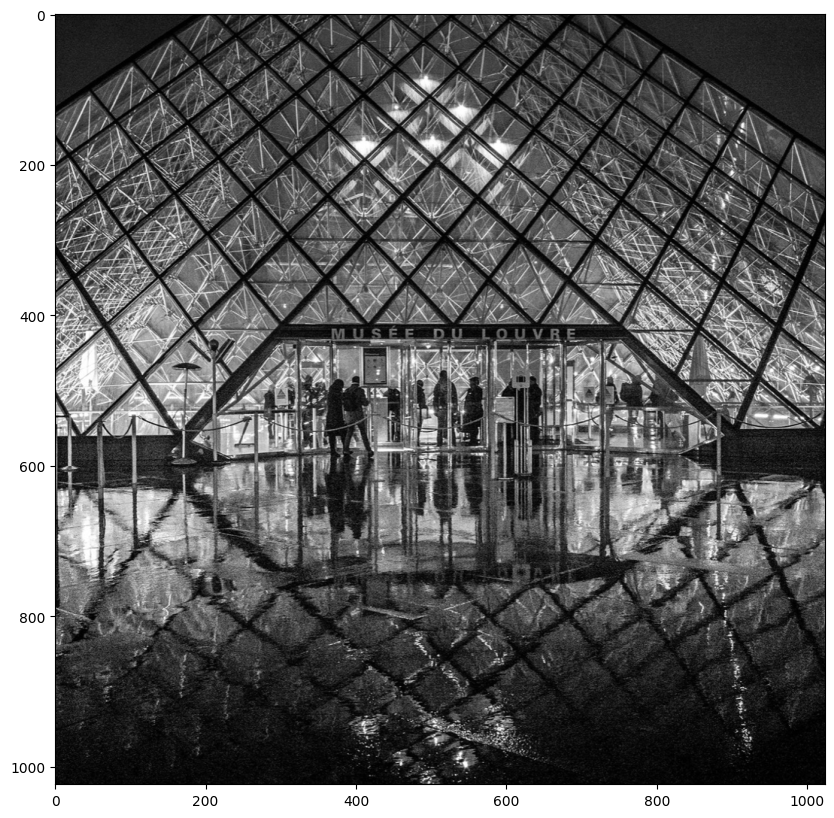

In [4]:
X = cv2.imread('louvre.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.show()

# Geometric Transformation

Input coordinates ${\bf X}$: $(i_0,j_0)$

Output coordinates ${\bf Y}$: $(i,j)$



$i_0 = a_{11}i + a_{12}j+a_{13}$

$j_0 = a_{21}i + a_{22}j+a_{23}$

where ${\bf m} = [i \ j \ 1]^{\sf T}$ y ${\bf m}_0 = [i_0 \ j_0 ]^{\sf T}$.

Thus,

${\bf m}_0 = {\bf A}{\bf m}$

In [5]:
# Interpolation using nearest integer towards zero
def geo_transformation(X,A,Yshape=None):

  if Yshape is None:
    (N,M) = X.shape
  else:
    (N,M) = Yshape
  Y = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:3] = [i,j,1]
      t = t+1

  m0  = np.dot(A,m.T)          # (i,j) -> (i0,j0) using equation explained above
  mpf = np.fix(m0).astype(int) # nearest integer towards zero

  # verification: does the pixel (i0,j0) belong to the image?
  i0 = mpf[0,:]
  j0 = mpf[1,:]
  kti = np.logical_and(i0>=0,i0<N)
  ktj = np.logical_and(j0>=0,j0<M)
  kt  = np.logical_and(kti,ktj)

  # output image
  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Y[i,j] = X[i0[t],j0[t]]
      t = t+1
  return Y

# Translation

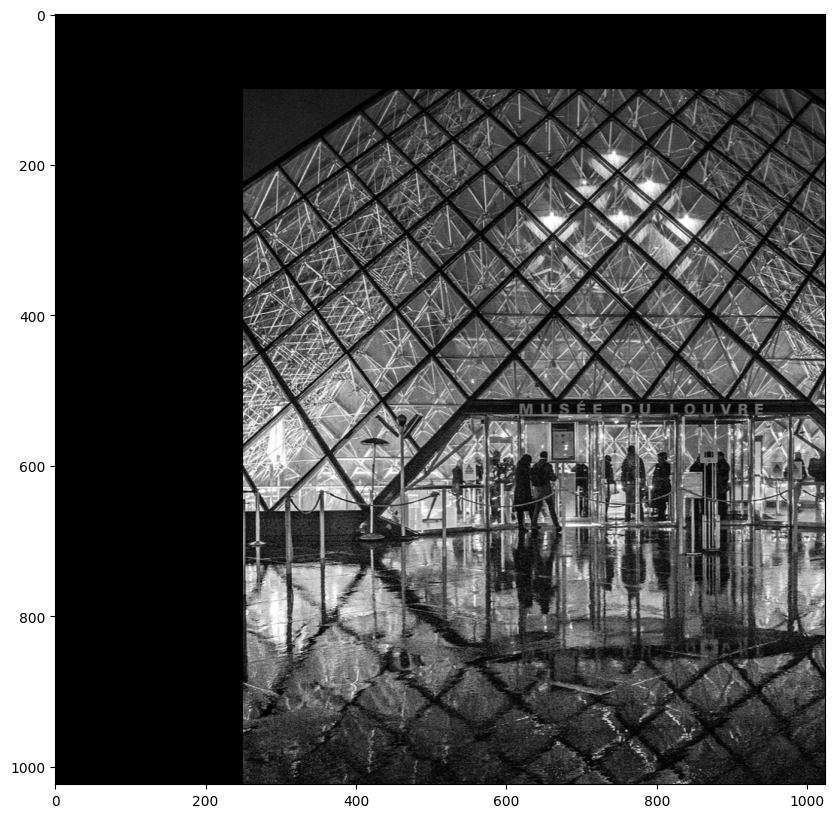

In [6]:
a11 = 1
a12 = 0
a13 = -100

a21 = 0
a22 = 1
a23 = -250

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()


# Rotation

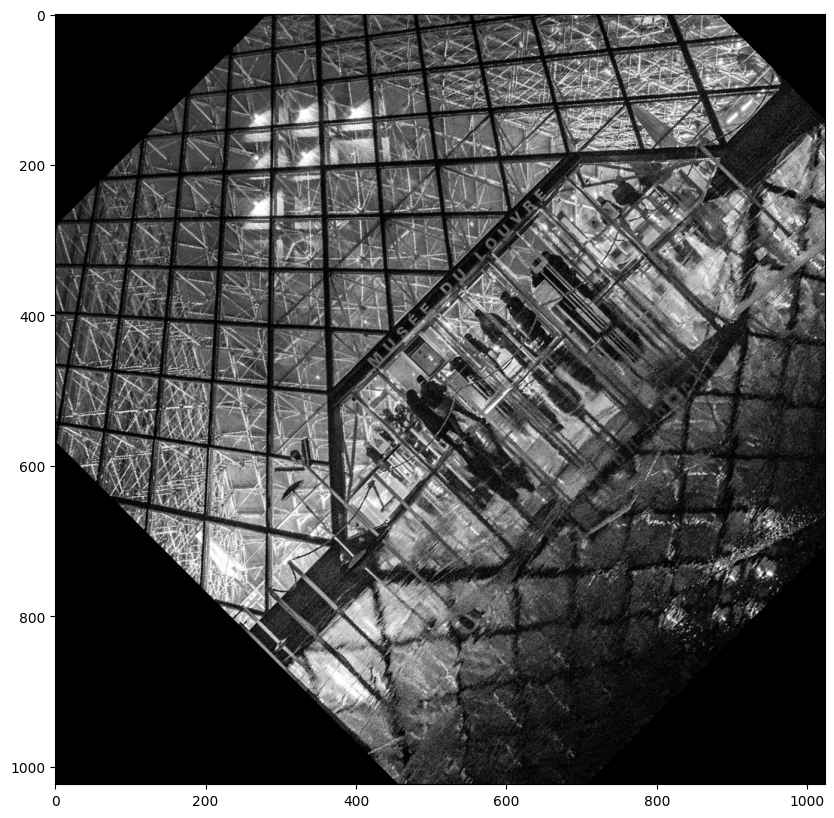

In [7]:
theta = 45.0 / 180.0 * np.pi
a11   = np.cos(theta)
a12   = np.sin(theta)
a13   = -200
a21   = -np.sin(theta)
a22   =  np.cos(theta)
a23   = 400
a1    = np.array([a11,a12,a13])
a2    = np.array([a21,a22,a23])
A     = np.vstack([a1,a2])
Y     = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

# Scaling

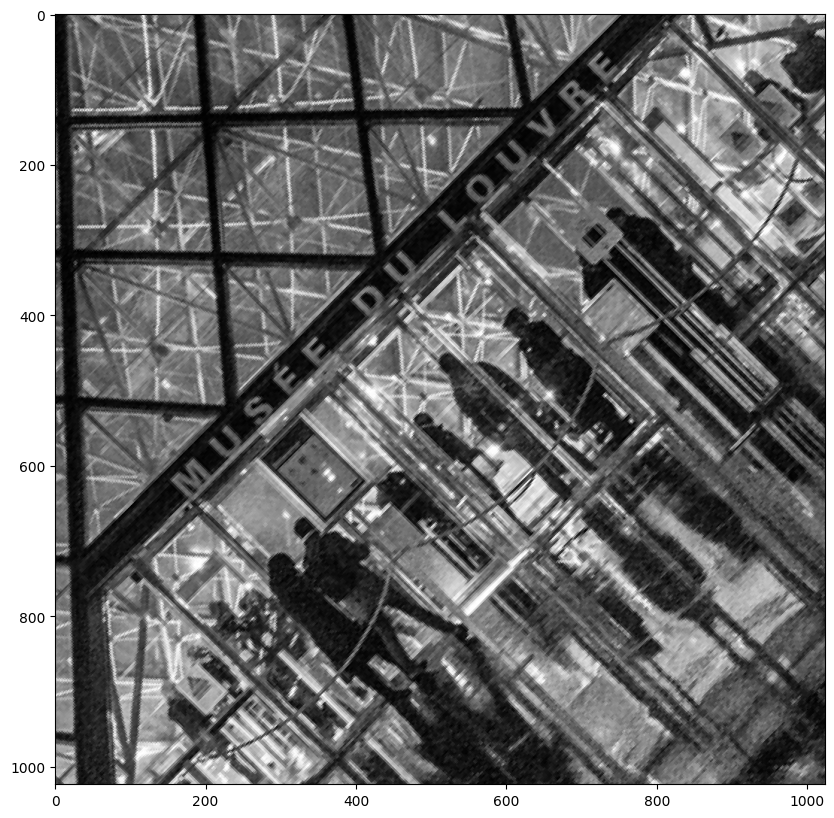

In [8]:
theta = 45.0 / 180.0 * np.pi

s     = 0.4


a11 = s*np.cos(theta)
a12 = s*np.sin(theta)
a13 = 200

a21 = -s*np.sin(theta)
a22 =  s*np.cos(theta)
a23 = 500

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()


# Example: Watch correction using Affine Transformation

[Affine transformation](https://mathworld.wolfram.com/AffineTransformation.html): *An affine transformation is any transformation that preserves collinearity (i.e., all points lying on a line initially still lie on a line after transformation) and ratios of distances (e.g., the midpoint of a line segment remains the midpoint after transformation).* `Wolfram Mathworld`

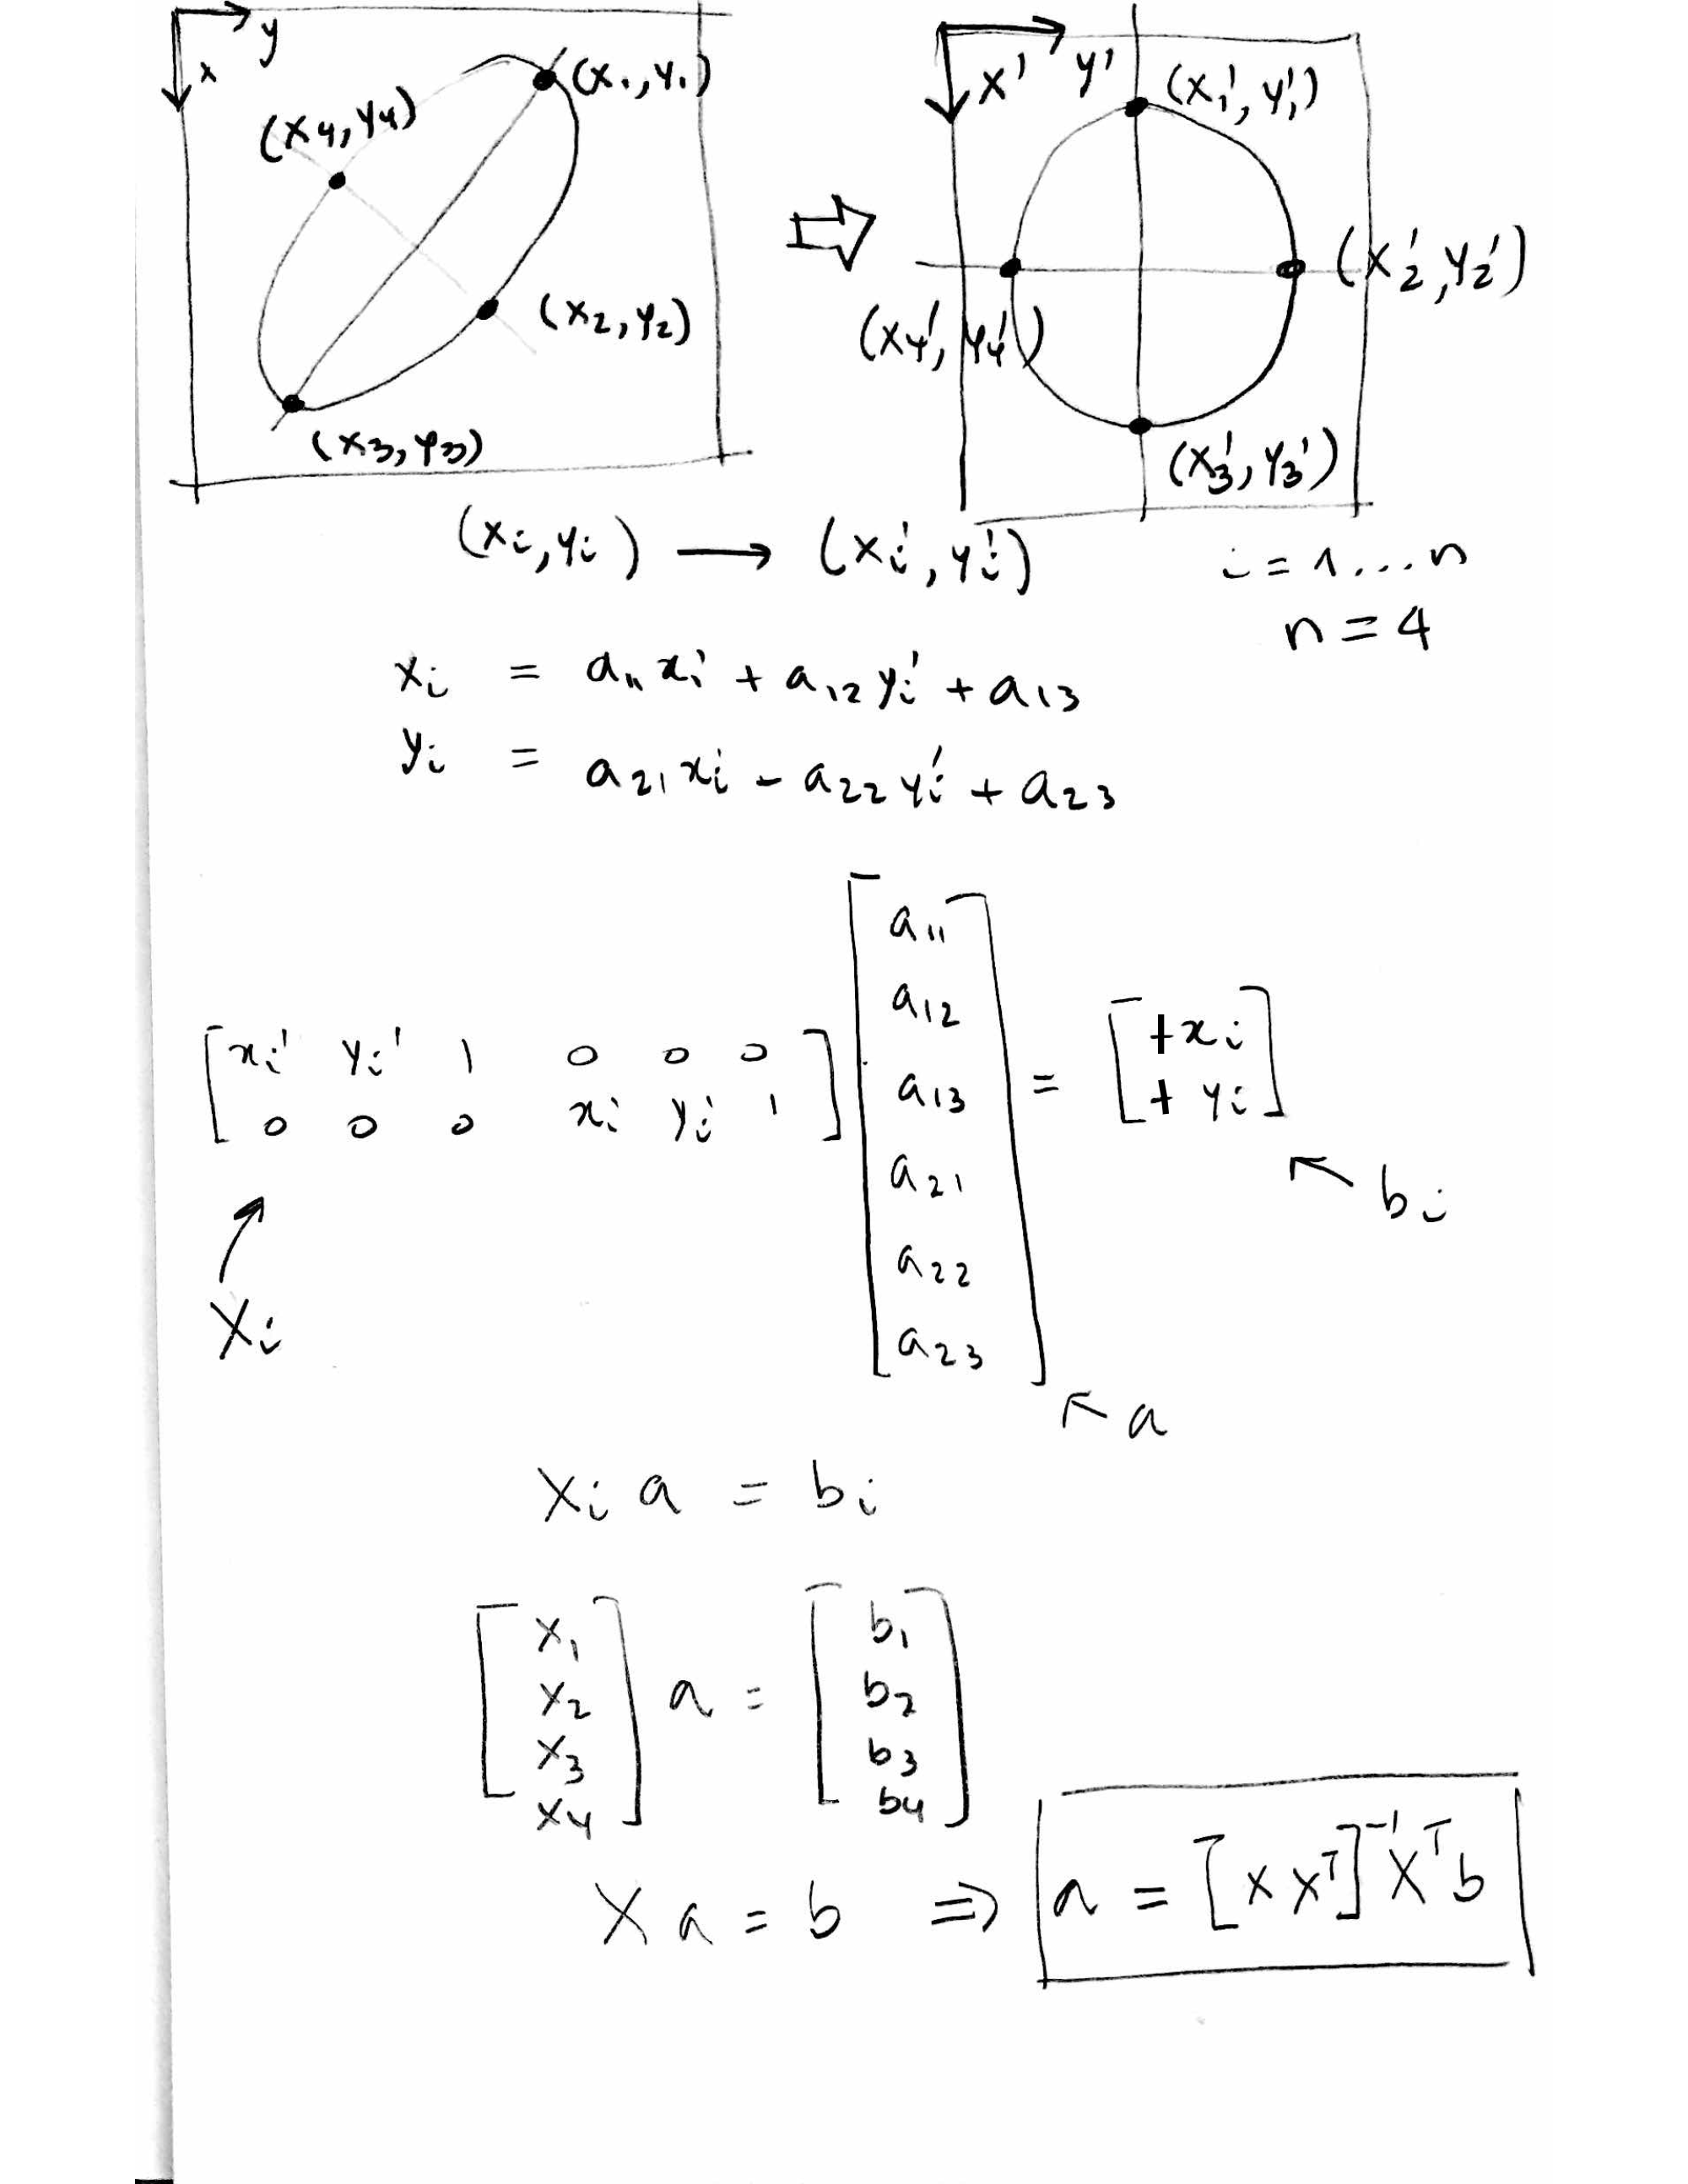

In [9]:
!wget https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png

--2024-08-29 20:53:49--  https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/lvud2wb39envi7be19c1c/clock.png?rlkey=a5v5cb926zgbxcgfxyem7s60x [following]
--2024-08-29 20:53:50--  https://www.dropbox.com/scl/fi/lvud2wb39envi7be19c1c/clock.png?rlkey=a5v5cb926zgbxcgfxyem7s60x
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce61ba77b0fb4aa77dfb8e624b2.dl.dropboxusercontent.com/cd/0/inline/CZnjtzXnDRooUidW55mOVVkTuc9tjfhItcHtBjQqdjIU2O1yGorZ80Yl6a--4HpQI58RSW8A1SR6fL8X7sZAiK4w_tKpZNC1ylPDTxABhj_C-9oCuvGxh_C7jbaK1tmZ8yc/file# [following]
--2024-08-29 20:53:50--  https://uce61ba77b0fb4aa77dfb8e624b2.dl.dropboxusercontent.com/cd/0/inline/CZnjtzXnDRooUidW55mOVVkTuc9tjfh

size =  (756, 1008)


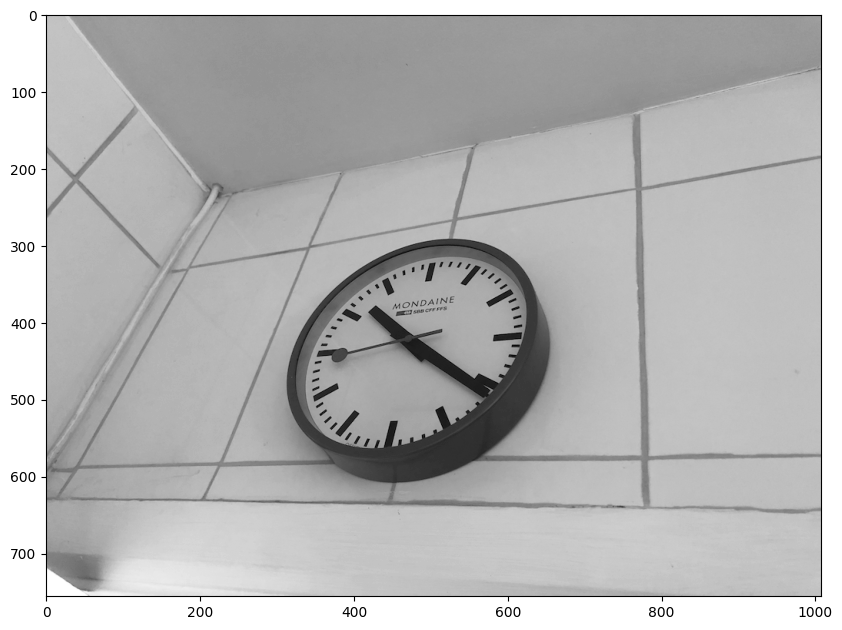

In [10]:
X = cv2.imread('clock.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.show()

WARNING: the geometric distortion in this example is the perspective, however, in this picture the distortion is similar to an affine transformation

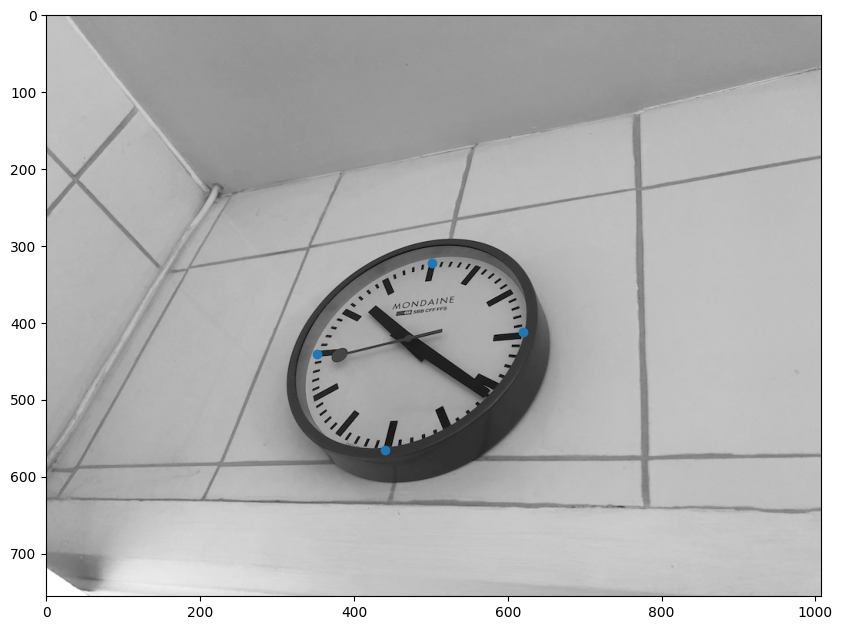

In [11]:
# Coordinates (i,j) (manually estimated for 12, 3, 6 y 9 o'clock):
b1 = np.array([322,502]).reshape(2,1)   # 12:00
b2 = np.array([412,620]).reshape(2,1)   # 03:00
b3 = np.array([565,440]).reshape(2,1)   # 06:00
b4 = np.array([440,352]).reshape(2,1)   # 09:00

i = [b1[0],b2[0],b3[0],b4[0]]
j = [b1[1],b2[1],b3[1],b4[1]]

plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.scatter(j,i)
plt.show()


In [13]:
# output, the four selected points are in the output image at coordinates (q+/-r,q+/-r)
r  = 200.0
q  = 400
m  = np.array([0,0,0])

c1 = np.array([q-r,q,1])
X1 = np.vstack([np.hstack([c1,m]),np.hstack([m,c1])])

c2 = np.array([q,q+r,1])
X2 = np.vstack([np.hstack([c2,m]),np.hstack([m,c2])])

c3 = np.array([q+r,q,1])
X3 = np.vstack([np.hstack([c3,m]),np.hstack([m,c3])])

c4 = np.array([q,q-r,1])
X4 = np.vstack([np.hstack([c4,m]),np.hstack([m,c4])])

A  = np.vstack([X1,X2,X3,X4])
b  = np.vstack([b1,b2,b3,b4])

print(A)
print(b)

t = np.linalg.lstsq(A, b, rcond=None)[0]  # inv(A'*A)*A'*b;


[[200. 400.   1.   0.   0.   0.]
 [  0.   0.   0. 200. 400.   1.]
 [400. 600.   1.   0.   0.   0.]
 [  0.   0.   0. 400. 600.   1.]
 [600. 400.   1.   0.   0.   0.]
 [  0.   0.   0. 600. 400.   1.]
 [400. 200.   1.   0.   0.   0.]
 [  0.   0.   0. 400. 200.   1.]]
[[322]
 [502]
 [412]
 [620]
 [565]
 [440]
 [440]
 [352]]


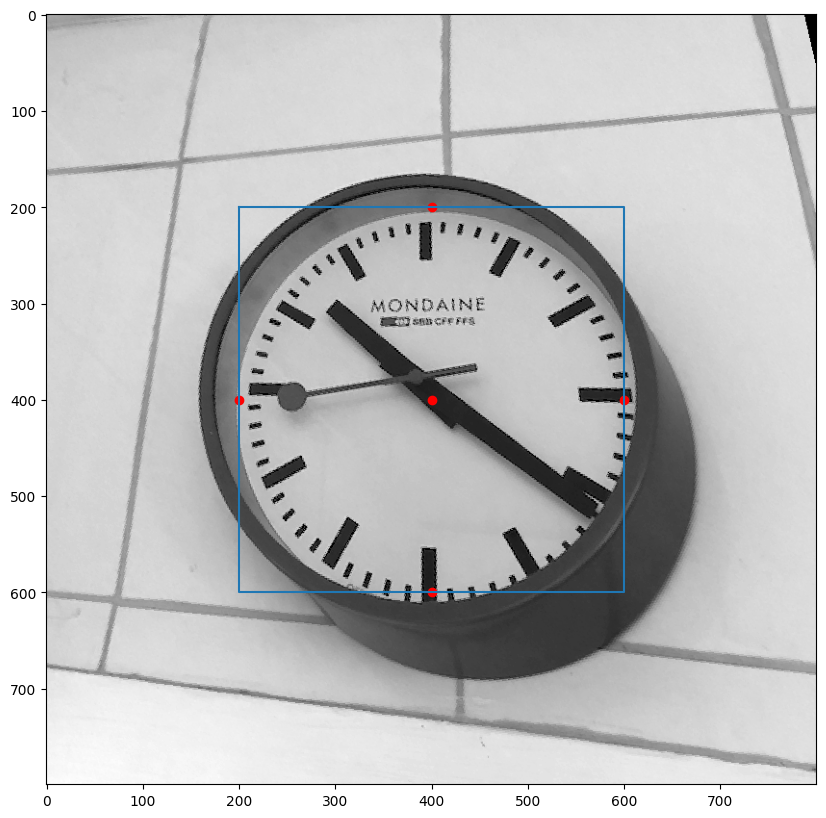

In [14]:
a1 = np.array([t[0],t[1],t[2]]).reshape(1,3)
a2 = np.array([t[3],t[4],t[5]]).reshape(1,3)

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A,(2*q,2*q))
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')

i = np.array([q-r,q-r,q+r,q+r,q-r])
j = np.array([q-r,q+r,q+r,q-r,q-r])
plt.plot(j,i)

i = [c1[0],c2[0],c3[0],c4[0],q]
j = [c1[1],c2[1],c3[1],c4[1],q]
plt.scatter(j,i,c='red')

plt.show()